# ACF -- Ackerberg, Caves, Frazer
* This time, trying joint estimation
* Refer to ACF_simple_twostep for an easier version, which estimates $\Phi$ first with polynomial regression, then estimates the betas with GMM. 

# Review -- Two-Step Identification Procedure:
For a simple example, suppose $\omega_{it} = \rho \omega_{it-1} + \xi_{it}.$ Then
$g(x) = E[x|\omega_{it-1}] = \rho \omega_{it-1}.$ Assume labor is chosen after time $t-1$. Then the estimation procedure is: 

## (1) Regress $y_{it}$ on $\left(k_{it}, l_{it}, m_{it}\right)$ nonparametrically, or using a high-order polynomial, to obtain $\hat{\tilde \Phi}_t\left(k_{it}, l_{it}, m_{it}\right).$

We do this for every period to get a sequence of functions of $(k, l, m).$ These will be plugged in for $\Phi$ in the next step. 

## (2) Use the following four moment conditions to estimate the parameters $\left(\beta_0, \beta_k, \beta_l, \rho\right):$

$$
E\left[\left(y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - \rho\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right) \otimes \begin{pmatrix} 1 \\ k_{it} \\ l_{it-1} \\ \tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) \\ \end{pmatrix} \right] = 0
$$

Here's where we use GMM. 

# New version: Joint Identification

Now, we include the parameters used to fit $\Phi$ into the GMM estimation. 
We fit $\Phi$ with a $d$-degree polynomial, and the coefficients of that polynomial are identified by moments.
In ACF, equation (31) shows their joint estimation moment conditions: 

$$
    E\begin{bmatrix}
    \varepsilon_{it} \big| \mathcal I_{it} \\ 
    \xi_{it}+\varepsilon_{it} \big| \mathcal I_{it-1}                
    \end{bmatrix} = 
    E\begin{bmatrix}
    y_{it} - \tilde\Phi_t(k_{it}, l_{it}, m_{it}) \;\; \big| \;\; \mathcal I_{it} \\ 
    y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - g\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right) \;\; \big| \;\; \mathcal I_{it-1}                
    \end{bmatrix} 
$$

where $g(\cdot)$ is the conditional expectation of productivity and $\mathcal I_{it}$ is the information set of firm $i$ at time $t$.  

For each time t, the full $d$-degree polynomial fit of $y = \Phi_t(k, l, m)$ will have $\begin{pmatrix} k+d \\ k \end{pmatrix}$ coefficients, where $k$ is the number of variables (in this case 3). 

$$
\Phi_t^2(k, l, m) = \gamma_{0,0,0} + \gamma_{1,0,0}k + \gamma_{0,1,0}l + \gamma_{0,0,1}m + \gamma_{1,1,0}kl + \gamma_{1,0,1}km + \gamma_{0,1,1}lm + \gamma_{2,0,0}k^2 + \gamma_{0,2,0}l^2 + \gamma_{0,0,2}m^2
$$

But we need to fit $\Phi_t$ for each year. 

So, assuming $g(x) = \rho x$, the vector of parameters to identify is: 

$$
\mathbf \theta = \left[ \beta_0, \beta_k, \beta_l, \rho, \underbrace{\mathbf \gamma_{1}}_{kCd\times 1}, ...,  \underbrace{\mathbf \gamma_{T}}_{kCd\times 1}  \right]_{4 + T\cdot(kCd)}
$$

The first four parameters can be identified using the moments from the "simple" ACF:  

$$
E\left[\operatorname{vec}\left(y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - \rho\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right) \otimes \begin{pmatrix} 1 \\ k_{it} \\ l_{it-1} \\ \tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) \\ \end{pmatrix} \right] = 0
$$

Note that we will need to plug in the polynomial coefficients into the $\Phi$ here, from our parameter guess $\theta$. Also note that the final term with $\Phi$ in it is used as our moment for identifying $\rho$.

The $T\cdot(kCd)$ "gammas" can be estimated using the moments for linear regression, at each time period. Each of the vectors below is "Number of firms at time t"-by-1.

$$
\text{Regression at t=0:}\begin{pmatrix}
\mathbf 1^\intercal \left[ y_{i0} - \tilde\Phi_0(k_{i0}, l_{i0}, m_{i0})  \right] \\
 (k_{i0})^\intercal \left[ y_{i0} - \tilde\Phi_0(k_{i0}, l_{i0}, m_{i0})  \right] \\
 (l_{i0})^\intercal \left[ y_{i0} - \tilde\Phi_0(k_{i0}, l_{i0}, m_{i0})  \right] \\
 (m_{i0})^\intercal \left[ y_{i0} - \tilde\Phi_0(k_{i0}, l_{i0}, m_{i0})  \right] \\
(k_{i0}l_{i0})^\intercal \left[ y_{i0} - \tilde\Phi_0(k_{i0}, l_{i0}, m_{i0})  \right] \\
\vdots \\
 (l_{i0}^2)^\intercal \left[ y_{i0} - \tilde\Phi_0(k_{i0}, l_{i0}, m_{i0})  \right] \\
\end{pmatrix}
$$

$$
\text{Regression at t=T:}\begin{pmatrix}
\mathbf 1^\intercal \left[ y_{iT} - \tilde\Phi_T(k_{iT}, l_{iT}, m_{iT})  \right] \\
 (k_{iT})^\intercal \left[ y_{iT} - \tilde\Phi_T(k_{iT}, l_{iT}, m_{iT})  \right] \\
 (l_{iT})^\intercal \left[ y_{iT} - \tilde\Phi_T(k_{iT}, l_{iT}, m_{iT})  \right] \\
 (m_{iT})^\intercal \left[ y_{iT} - \tilde\Phi_T(k_{iT}, l_{iT}, m_{iT})  \right] \\
(k_{iT}l_{iT})^\intercal \left[ y_{iT} - \tilde\Phi_T(k_{iT}, l_{iT}, m_{iT})  \right] \\
\vdots \\
 (l_{iT}^2)^\intercal \left[ y_{iT} - \tilde\Phi_T(k_{iT}, l_{iT}, m_{iT})  \right] \\
\end{pmatrix}
$$
Here we have $T\cdot(kCd)$ moments fo the $T\cdot(kCd)$ "gammas." 


# Load in the data


In [12]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math
from itertools import combinations_with_replacement, chain

In [27]:
filename = "../PS3_data_changedtoxlsx.xlsx"
cols_to_keep = [0, 2, 3, 4, 5, 6, 40, 43, 44]
#new_names = ["year", "firm_id", "obs", "ly", "s01", "s02", "lc", "ll", "lm"]
new_names = ["year", "firm_id", "obs", "y", "s01", "s02", "k", "l", "m"]
#Load in the data
df = pd.read_excel(filename, usecols=cols_to_keep)
df.columns = new_names
#Keep industry 1 only
df=df[df['s01']==1]




#DATA = df[['lc', 'll', 'lm']]
#y = df[['ly']]
#Convert to arrays
#y = y.to_numpy()
#DATA = DATA.to_numpy()

KeyError: "None of [Index(['lc', 'll', 'lm'], dtype='object')] are in the [columns]"

# First step of coding: Write functions for the estimation of $\tilde \Phi_t.$

In [15]:
def poly_terms(n_features, degree):
    #This thing creates an iterator structure of tuples, used to create polynomial interaction terms. 
    #It looks something like this
    #(0,)
    #(1,)
    #(2,)
    #(0, 0)
    #(0, 1), etc 
    polynomial_terms = chain(
        *(combinations_with_replacement(range(n_features), d) for d in range(1, degree+1))
    )
    return(polynomial_terms)

#Will not need this function for this version of the code.
def fit_phi_poly(y, DATA, degree):
    #Get number of observations (n) and number of independent variables (k)
    #y = y.to_numpy()
    #DATA = DATA.to_numpy()
    if DATA.ndim == 1:
        DATA.reshape(1, -1)
    # Get the number of samples (n) and number of features (m) from X
    n_samples, n_features = DATA.shape
    
    # Start with a column of ones for the intercept term
    X_poly = np.ones((n_samples, 1))

    #Create iterator used to construct polynomial terms
    polynomial_terms = poly_terms(n_features, degree)
    
    # Generate polynomial terms and interaction terms up to 4th degree
    for terms in  polynomial_terms:  # For degrees 1 to 4
            X_poly = np.hstack((X_poly, np.prod(DATA[:, terms], axis=1).reshape(-1, 1)))
    
    # Compute the coefficients using the normal equation: beta = (X.T * X)^(-1) * X.T * y
    XT_X = X_poly.T @ X_poly
    XT_X_inv = np.linalg.inv(XT_X)
    XT_y = X_poly.T @ y
    beta = XT_X_inv @ XT_y

    return beta

#Function to evaluate the fitted values of the polynomial regression
def eval_phi_poly(DATA, degree, beta):

    if DATA.ndim == 1:
        DATA = DATA.reshape(1, -1)
    # Get the number of samples (n) and number of features (m) from X
    n_samples, n_features = DATA.shape
    # Create polynomial terms iterator
    polynomial_terms = poly_terms(n_features, degree)

    # Start with a column of ones for the intercept term
    X_poly = np.ones((n_samples, 1))
    
    # Generate polynomial terms and interaction terms up to 4th degree
    for terms in  polynomial_terms:  # For degrees 1 to 4
            X_poly = np.hstack((X_poly, np.prod(DATA[:, terms], axis=1).reshape(-1, 1)))
    
    yhat = X_poly@beta
    
    # Generate polynomial terms and interaction terms up to 4th degree
    #yhat = np.zeros((n_samples,1))
    #for terms in  polynomial_terms:  # For degrees 1 to 4
    #        yhat = np.sum(yhat, beta*np.prod(DATA[:, terms], axis=1).reshape(-1, 1))

    return yhat

# Coding for joint method

In [20]:
#Data transformation/utility functions
def df_to_dict(df):
    dict_of_arrays = {col: df[col].to_numpy() for col in df.columns}
    return dict_of_arrays


In [ ]:

#Extracts the relevant arguments for ACF estimation from the data frame
def format_args_ACF(df):
    #new dataframe
    #Getting data in the correct format
    y = df['ly'].to_numpy()
    Phi = df['Phi'].to_numpy()
    Phiprev = df['Phi'].shift(1).to_numpy()
    k = df['lc'].to_numpy()
    kprev =  df['lc'].shift(1).to_numpy()
    l = df['ll'].to_numpy()
    lprev =  df['ll'].shift(1).to_numpy()
    t =  df['year'].to_numpy()
    args_ACF = (y, Phi, Phiprev, k, kprev, l, lprev, t)
    return args_ACF

#Creates matrix 


def moment_error_ACF(theta, df):
    betas = theta[:4] #extract beta_0, beta_k, beta_l, and rho
    # First calculate the error for the first moments (not the gammas which dictate the approximation of Phi
    #[beta_0, beta_k, beta_l, rho]
    moments_betas = (y - theta[0] - theta[1]*k - theta[2]*l - 
             theta[3]*(Phiprev - theta[0] - theta[1]*kprev - theta[2]*lprev) )
    #remove nans (associated with the lag) -- this is ok because we're just using this vector as part of a dot product. 
    moments_betas = np.nan_to_num(moments_betas, nan = 0)
    # Next calculate the error for the "gammas" moments, i.e. the linear regression moments 



#Extracts the relevant arguments for ACF estimation from the data frame
def format_args_ACF(df):
    #new dataframe
    #Getting data in the correct format
    y = df['ly'].to_numpy()
    Phi = df['Phi'].to_numpy()
    Phiprev = df['Phi'].shift(1).to_numpy()
    k = df['lc'].to_numpy()
    kprev =  df['lc'].shift(1).to_numpy()
    l = df['ll'].to_numpy()
    lprev =  df['ll'].shift(1).to_numpy()
    t =  df['year'].to_numpy()
    args_ACF = (y, Phi, Phiprev, k, kprev, l, lprev, t)
    return args_ACF

#Calculates the error term, h(theta, y, k, l)
def moment_error_ACF(theta, args):
    #get the variables we need
    y, Phi, Phiprev, k, kprev, l, lprev, t = args
    gamma = theta[4]
    # First calculate the error for the first moments (not the gammas which dictate the approximation of Phi
    #[beta_0, beta_k, beta_l, rho]
    value = (y - theta[0] - theta[1]*k - theta[2]*l - 
             theta[3]*(Phiprev - theta[0] - theta[1]*kprev - theta[2]*lprev) )
    #remove nans (associated with the lag) -- this is ok because we're just using this vector as part of a dot product. 
    value = np.nan_to_num(value, nan = 0)
    return value

#Parameter guess 
theta = (betas, gammas)



def 

## Function for evaluating the Phi function

In [7]:
def fit_phi_poly_years(df, degree):

    years = np.unique(df[["year"]])
    
    #Dictionary for storing the polynomial fits associated with each year
    phi_beta_dict = {}
    
    for t in years: 
        #Get data for the current year
        df_t = df[df["year"] == t]
        y_t = df_t[["ly"]].to_numpy()
        DATA_t = df_t[['lc', 'll', 'lm']].to_numpy()
        #fit the polynomial
        beta_t = fit_phi_poly(y_t, DATA_t, degree)
        phi_beta_dict[t] = beta_t

    return phi_beta_dict


def phi_wrapper(row, xvars, phi_beta_dict, degree):
    DATA_row = row[xvars].to_numpy()
    t = row['year']
    beta = phi_beta_dict[t] #Get the beta fit to the particular year
    Phihat = eval_phi_poly(DATA_row, degree, beta).item()

    return Phihat

#Year-by-year --- Function to evaluate the fitted values of the polynomial regression
def eval_phi_poly_years(df, xvars, degree):
    #Year-by-year, fit the Phi function 
    phi_beta_dict = fit_phi_poly_years(df, degree)
    firms = np.unique(df[["firm_id"]])    
    df_phi = df.apply(phi_wrapper, axis = 1, args = (xvars, phi_beta_dict, degree) ).to_numpy()
    
    return df_phi

In [8]:
#phi_beta_dict = fit_phi_poly_years(df, degree)
df_phi = eval_phi_poly_years(df, xvars = ['lc', 'll', 'lm'], degree=2) #Higher degree than 2 and it tends to be overfit
#Add into the dataframe
df["Phi"] = df_phi

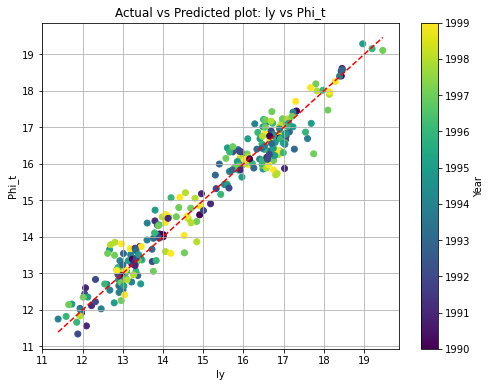

In [9]:
#Actual vs Predicted plot
# Assuming df is a structured NumPy array
actual_values = df['ly']     # Extract the actual values
predicted_values = df['Phi'] # Extract the predicted values
years = df['year']

# Create the plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(actual_values, predicted_values, c=years, cmap='viridis', label='Predicted vs Actual')
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='--', label='Perfect Fit')

# Add a color bar to represent the year scale
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Add labels and title
plt.xlabel('ly')
plt.ylabel('Phi_t')
plt.title('Actual vs Predicted plot: ly vs Phi_t')
plt.grid(True)

# Show the plot
plt.show()

## Now, we have our polynomial fit. Time to start coding GMM
We have four parameters: $\beta_0$, $\beta_k$, $\beta_l$, and $\rho$.
Each of the four moment conditions state that 
$$E\left[\left(\xi_{it}+\epsilon_it\right)\left(Z\right)\right] = 0,$$ where $Z$ is one of the elements of the firm's information set at time $t-1.$

## Get a function that evaluates the objective function of the GMM estimator

The objective function minimizes the weighted errors of the moment restrictions with respect to parameters $\theta$. It is

$$
\min_\theta \left\{     \mathbf e\left(\mathbf y, \mathbf k, \mathbf l|\theta\right)^\intercal_{1\times 4} \times\left(\mathbb W_{4\times 4}\right) \times      \mathbf e\left(\mathbf y, \mathbf k, \mathbf l|\theta\right)_{4\times 1} \right\} \equiv
$$



$$
\min_\theta \left\{   \left[ \begin{pmatrix} 1^\intercal \\ \operatorname{vec}(k_{it})^\intercal \\ \operatorname{vec}(l_{it-1})^\intercal \\ \operatorname{vec}\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right)\right)^\intercal \\ \end{pmatrix} \cdot h(\theta, \mathbf y, \mathbf k, \mathbf l)\right]^\intercal_{1\times 4} \times  \left(\mathbb W_{4\times 4}\right) \times \left[ \begin{pmatrix} 1^\intercal \\ \operatorname{vec}(k_{it})^\intercal \\ \operatorname{vec}(l_{it-1})^\intercal \\ \operatorname{vec}\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right)\right)^\intercal \\ \end{pmatrix} \cdot  h(\theta, \mathbf y, \mathbf k, \mathbf l)  \right]_{4\times 1} \right\}, 
$$


which is a scalar, where

$$
h(\theta, \mathbf y, \mathbf k, \mathbf l) = \operatorname{vec}\left(y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - \rho\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right).
$$

In words, we take the dot product of the $h$ function with each of the vectors in the big pmatrix, and get four moment conditions in total. 


In [1]:
#Extracts the relevant arguments for ACF estimation from the data frame
def format_args_ACF(df):
    #new dataframe
    #Getting data in the correct format
    y = df['ly'].to_numpy()
    Phi = df['Phi'].to_numpy()
    Phiprev = df['Phi'].shift(1).to_numpy()
    k = df['lc'].to_numpy()
    kprev =  df['lc'].shift(1).to_numpy()
    l = df['ll'].to_numpy()
    lprev =  df['ll'].shift(1).to_numpy()
    t =  df['year'].to_numpy()
    args_ACF = (y, Phi, Phiprev, k, kprev, l, lprev, t)
    return args_ACF

#Calculates the error term, h(theta, y, k, l)
def moment_error_ACF(theta, args):
    #get the variables we need
    y, Phi, Phiprev, k, kprev, l, lprev, t = args
    gamma = theta[4]
    # First calculate the error for the first moments (not the gammas which dictate the approximation of Phi
    #[beta_0, beta_k, beta_l, rho]
    value = (y - theta[0] - theta[1]*k - theta[2]*l - 
             theta[3]*(Phiprev - theta[0] - theta[1]*kprev - theta[2]*lprev) )
    #remove nans (associated with the lag) -- this is ok because we're just using this vector as part of a dot product. 
    value = np.nan_to_num(value, nan = 0)
    return value

def moment_ex_restrictions_ACF(args):
    y, Phi, Phiprev, k, kprev, l, lprev = args
    #Moment conditions include exogeneity restrictions for 1, k_{it}, l_{it-1}, and Phi. 
    #Put them all in one matrix for easy access, called Vexc (short for vectors for exogeneity restrictions)
    #Replace all nans with zeros -- this is ok, because we're just taking a dot product over each row of this matrix, and want to remove the nans
    Vex = np.nan_to_num(np.vstack([np.ones(len(k)), k, lprev, Phiprev]),  nan=0)
    return Vex

def gmm_obj_ACF(theta, args, Vex, W):
    #Arguments
    y, Phi, Phiprev, k, kprev, l, lprev = args
    #Get the vector h(theta, y, k, l)
    moment_error = moment_error_ACF(theta, args_ACF)
    #Calculate the "error" -- exogenous terms (dotproduct) h(theta, y, k, l)
    err = Vex@moment_error
    #Calculate the weighted sum of the error using the weight matrix, W
    obj = err.T@W@err
    return obj

## Quick test -- evaluating the GMM objective function at $\theta = \mathbf 1$. 

In [35]:
#Run GMM
#Initial guess for parameters beta_0, beta_k, beta_l, rho
theta0 = np.array([1,1,1,1])
#Weight matrix -- use the identity for now. 
W0 = np.eye(4)
#(1) Get the arguments used in ACF from the data frame
args_ACF = format_args_ACF(df)
#(2) Get matrix of variables used in exogeneity restrictions
Vex = moment_ex_restrictions_ACF(args_ACF)
#Evaluate the GMM error
obj, gmm_obj_ACF(theta0, args_ACF, Vex, W0)
obj

1633305.5545537989

## Next step --  need to calculate the gradient to perform optimization. 

The gradient of the GMM objective function with respect to the parameters $\theta$ is
$$
\nabla_{\theta}  \mathbf e\left(\mathbf y, \mathbf k, \mathbf l|\theta\right)^\intercal_{1\times 4} \times\left(\mathbb W_{4\times 4}\right) \times      \mathbf e\left(\mathbf y, \mathbf k, \mathbf l|\theta\right)_{4\times 1} \equiv 2\left[\frac{\partial e\left(\mathbf y, \mathbf k, \mathbf l|\theta\right)}{\partial \theta}\right]^\intercal_{4\times 4}\times\left(\mathbb W_{4\times 4}\right) \times      \mathbf e\left(\mathbf y, \mathbf k, \mathbf l|\theta\right)_{4\times 1}
$$

where 

$$
\left[\frac{\partial e\left(\mathbf y, \mathbf k, \mathbf l|\theta\right)}{\partial \theta}\right]_{4\times 4} = \begin{bmatrix} 
1^\intercal\frac{ \mathbf \partial h(\theta, \mathbf y, \mathbf k, \mathbf l)}{\partial \beta_0} & 1^\intercal\frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)}{\partial \beta_k} & 1^\intercal\frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)}{\partial \beta_l} & 1^\intercal\frac{ \mathbf \partial h(\theta, \mathbf y, \mathbf k, \mathbf l)}{\partial \rho} \\
\operatorname{vec}(k_{it})^\intercal\frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_0} &\operatorname{vec}(k_{it})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_k} &\operatorname{vec}(k_{it})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_l} &\operatorname{vec}(k_{it})^\intercal  \frac{\partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \rho} \\
\operatorname{vec}(l_{it-1})^\intercal\frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_0} &\operatorname{vec}(l_{it-1})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_k} &\operatorname{vec}(l_{it-1})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_l} &\operatorname{vec}(l_{it-1})^\intercal  \frac{\partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \rho} \\
\operatorname{vec}(\Phi_{it-1})^\intercal\frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_0} &\operatorname{vec}(\Phi_{it-1})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_k} &\operatorname{vec}(\Phi_{it-1})^\intercal \frac{ \partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \beta_l} &\operatorname{vec}(\Phi_{it-1})^\intercal  \frac{\partial \mathbf h(\theta, \mathbf y, \mathbf k, \mathbf l)
}{\partial \rho} 
\end{bmatrix} 
$$

$$
\equiv \begin{bmatrix} 1^\intercal \\ \operatorname{vec}(k_{it})^\intercal \\ \operatorname{vec}(l_{it-1})^\intercal  \\ \operatorname{vec}(\Phi_{it-1})^\intercal \end{bmatrix}_{4\times n} \begin{bmatrix} \frac{\partial \mathbf h}{\partial \beta_0} & \frac{\partial \mathbf h}{\partial \beta_k} & \frac{\partial \mathbf h}{\partial \beta_l} & \frac{\partial \mathbf h}{\partial \rho}  \end{bmatrix}_{4x4}
$$


is the Jacobian of the error function with respect to $\theta = \left(\beta_0, \beta_k, \beta_l, \rho\right)$. 

We already have code to calculate the first matrix here -- it is just called ```Vex```, "vectors of exogeneity restrictions."
It remains to calculate the partial derivatives in the second matrix.

$$
\mathbf h = \operatorname{vec}\left(y_{it} - \beta_0 - \beta_k k_{it} - \beta_l l_{it} - \rho\left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right)
$$

$$
\frac{\partial \mathbf h}{\partial \beta_0} =  -1 + \rho
$$
$$
\frac{\partial \mathbf h}{\partial \beta_k} = -\operatorname{vec}(k_{it}) + \rho\operatorname{vec}(k_{it-1})
$$
$$
\frac{\partial \mathbf h}{\partial \beta_l} = -\operatorname{vec}(l_{it}) + \rho\operatorname{vec}(l_{it-1})
$$
$$
\frac{\partial \mathbf h}{\partial \rho} = \operatorname{vec}\left( - \left(\tilde \Phi_{t-1}\left(k_{it-1}, l_{it-1}, m_{it-1}\right) - \beta_0 - \beta_k k_{it-1} - \beta_l l_{it-1}\right)\right) 
$$





In [18]:
def jacobian_ACF(theta, args, Vex):
    y, Phi, Phiprev, k, kprev, l, lprev = args
    
    #Partial derivatives of h
    Dh = np.nan_to_num(np.vstack(
        [
         np.ones(len(k))*(-1 + theta[3]), #dh/dbeta0  
         -k + theta[3]*kprev,             #dh/dbetak
         -l + theta[3]*lprev,             #dh/dbetal
         -(Phiprev - theta[0] - theta[1]*kprev - theta[2]*lprev)
        ]
    ),  nan=0).T

    Jac = Vex@Dh
    return Jac


def gradient_ACF(theta, args, Vex, W):
    moment_error = moment_error_ACF(theta, args)
    err = Vex@moment_error
    Jac = jacobian_ACF(theta, args, Vex)
    Grad = (2*Jac.T @ W @ err)
    return Grad


In [23]:
#testing
Jac = jacobian_ACF(theta0, args_ACF, Vex)
Jac
Grad = gradient_ACF(theta0, args_ACF, Vex, W0)
Grad

array([ 0.00000000e+00,  4.21897327e+06, -1.15537652e+04, -2.73682493e+07])

## Now, use a minimization routine, with the Jacobian, to optimize for theta. 

In [48]:
args_ACF = format_args_ACF(df)
gmm_args = (args_ACF, Vex, W0)

#Solving using my own gradient
theta_results_grad = opt.minimize(gmm_obj_ACF, theta0, args=gmm_args,
                       tol=1e-14, jac=gradient_ACF, method='L-BFGS-B')
#Solving without providing a gradient
theta_results_nograd = opt.minimize(gmm_obj_ACF, theta0, args=gmm_args,
                        tol=1e-14, method='L-BFGS-B')
theta_results_grad.x, theta_results_nograd.x
theta_results = theta_results_grad.x

gmm_obj_ACF(theta_results, args_ACF, Vex, W0)

0.010508466106636766